In [1]:
import utils
import pandas as pd
import classifiers
import evaluations

In [2]:
df5s, df10s, df30s = utils.task4_df()

In [3]:
whole_df = pd.concat((df5s, df10s, df30s), ignore_index=True)

In [4]:
X_train, y_train, X_val, y_val = utils.train_val_split(whole_df)

In [5]:
y_val_pred = classifiers.tensorflow_fcnn(X_train, y_train, X_val, y_val)

Epoch 1/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - f1_score: 0.1941 - loss: 1.4411 - val_f1_score: 0.1956 - val_loss: 1.0138
Epoch 2/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - f1_score: 0.1956 - loss: 0.5054 - val_f1_score: 0.1957 - val_loss: 0.9336
Epoch 3/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - f1_score: 0.1956 - loss: 0.3010 - val_f1_score: 0.1955 - val_loss: 1.0803
Epoch 4/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - f1_score: 0.1956 - loss: 0.1656 - val_f1_score: 0.1954 - val_loss: 1.2056
Epoch 5/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - f1_score: 0.1956 - loss: 0.1107 - val_f1_score: 0.1955 - val_loss: 1.2335
62/62 - 0s - 784us/step - f1_score: 0.1955 - loss: 1.2335
{'f1_score': <tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.04579139, 0.07305533, 0.18361086, 0.15932915, 0.12908952,
       0.19199291, 0.24576083, 0.2400177 , 0.3444871 , 0.3420878 ],
      dtype=float32)>, 'loss': 1.2335395812988281}


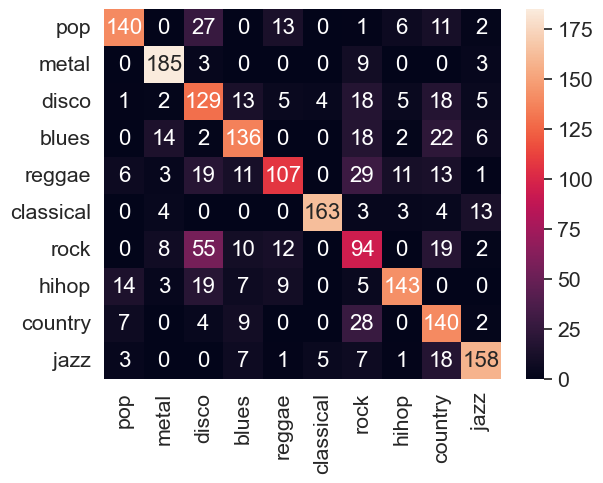

In [6]:
evaluations.conf_matrix(y_val_pred, y_val)

In [7]:
evaluations.multiclass_performance_metrics(y_val_pred, y_val, labels=utils.genreNames)

,tp,tn,fp,fn,F1Score
pop,140,1749,31,60,0.754717
metal,185,1746,34,15,0.883055
disco,129,1651,129,71,0.563319
blues,136,1723,57,64,0.692112
reggae,107,1740,40,93,0.616715
classical,163,1781,9,27,0.900552
rock,94,1662,118,106,0.456311
hihop,143,1752,28,57,0.770889
country,140,1685,105,50,0.643678
jazz,158,1746,34,42,0.806122


Accuracy : 0.6853535353535354


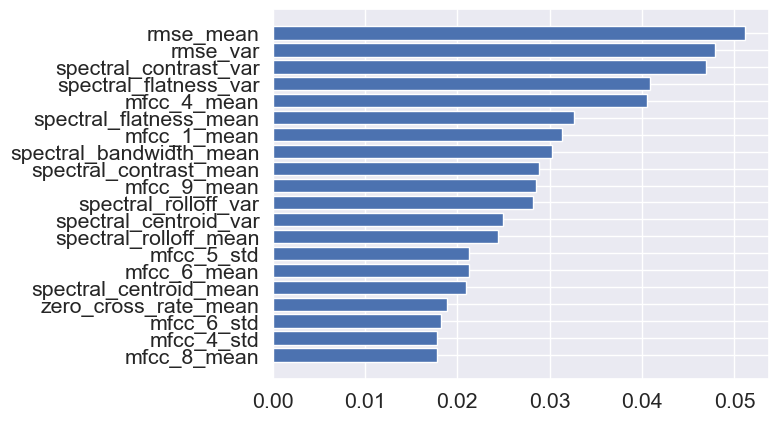

In [8]:
y_val_pred = classifiers.sklearn_rf(X_train, y_train, X_val, y_val)

The 4 most important features for the random forest are [rmse_mean, rmse_var, spectral_contrast_var, mfcc_4_mean]

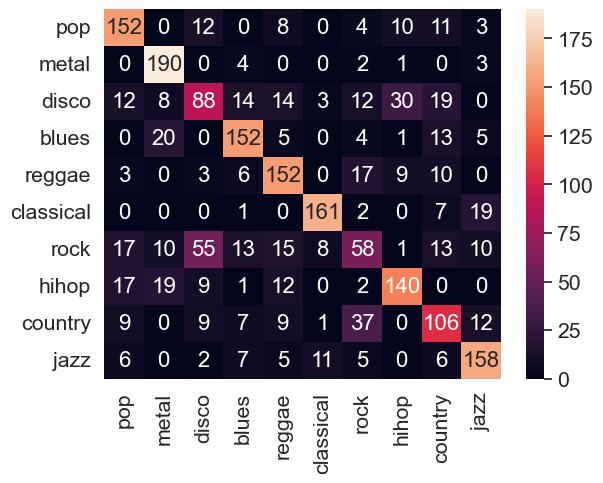

In [9]:
evaluations.conf_matrix(y_val_pred, y_val)

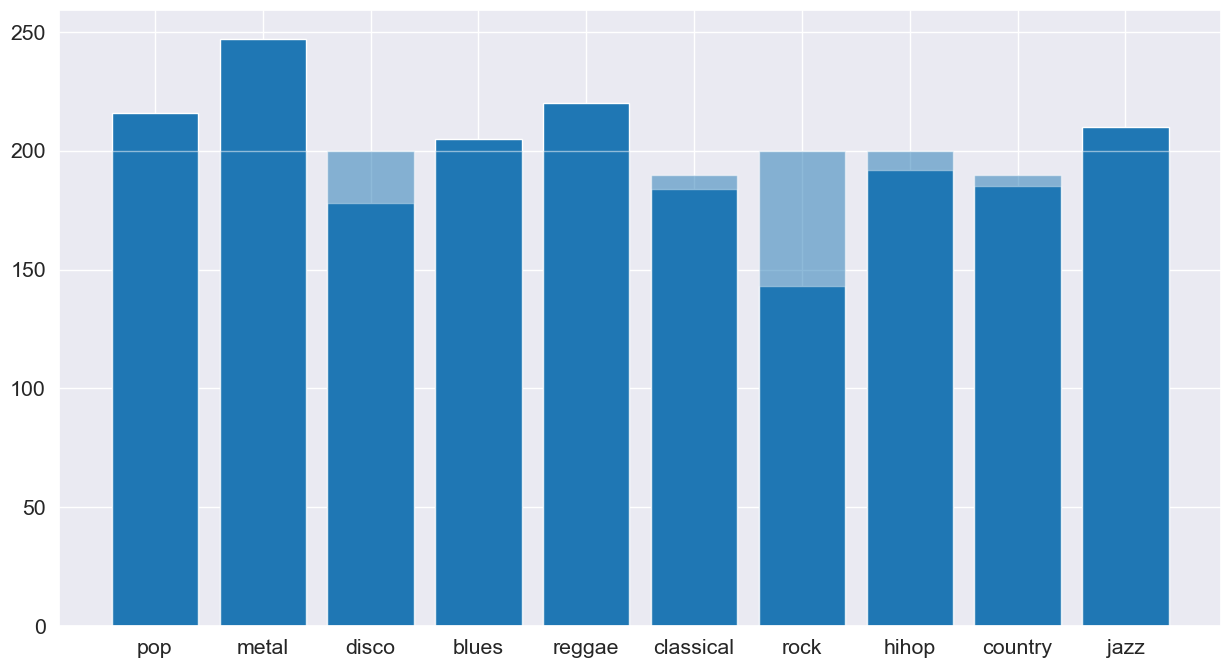

In [10]:
evaluations.distribution(y_val_pred, y_val)
